# **Méthode** : Descente du Gradient

In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
def gradient(f, x, h=1e-6):
    """
    Calcule le gradient d'une fonction
    """
    n = x.size
    grad = np.zeros(n)
    fx = f(x[0], x[1])
    
    # Loop over input variables
    for i in range(n):
        x1 = np.copy(x)
        x1[i] += h
        fx1 = f(x1[0], x1[1])
        
        grad[i] = (fx1 - fx) / h
        
    return grad

In [132]:
def gradient2D(f, x, y, h=1e-6):
    """
    Calcule le gradient de la fonction f en (x,y)
    en utilisant la méthode de différences finies.
    """
    dfdx = (f(x+h, y) - f(x-h, y)) / (2*h)
    dfdy = (f(x, y+h) - f(x, y-h)) / (2*h)

    return np.array([dfdx, dfdy])

In [133]:
def gradient1D(f, x):
    h = 1e-6
    return (f(x+h) - f(x-h)) / (2*h)

* **But** : trouver le minimum d'une fonction

* **Fonctionnement** : démarrer avec un point au hasard sur la courbe et se diriger vers une direction négative dans le sens du gradient de la fonction pour chercher le minimum local/global

# Exemple

* Création d'un jeu de données 

In [134]:
# Définition de f(x)

def f(x) :
    return x**2 - 3*x + 2

# Définition de df(x)

def df(x):
    return 2*x - 3

# Jeu de données
x = [i for i in range(-1000, 1000)]
y = [f(j) for j in x]


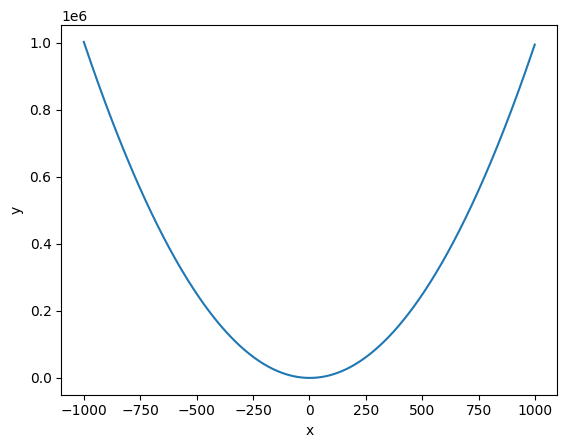

In [135]:
# Visualisation des données

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [136]:
# Méthode de descente de gradient

def gradient_descent(x0, alpha = 0.1, tol = 0.001):
    x = x0
    x_list = [x]
    
    while True:
        grad = gradient1D(f, x)
        x_new = x - alpha * grad
        
        if abs(x_new - x) < tol:
            break
        x = x_new
        x_list.append(x)
        
    return x, f(x), x_list

Minimum (1.504376, -0.249981)


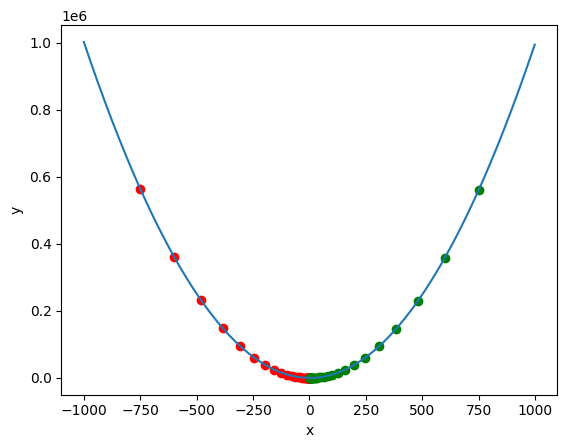

In [137]:
x_min, fx_min, list_of_x = gradient_descent(-750)
x_min, fx_min, list_of_x2 = gradient_descent(750)

list_of_fx  = [f(j) for j in list_of_x]
list_of_fx2 = [f(j) for j in list_of_x2]

plt.plot(x,y)

plt.scatter(list_of_x, list_of_fx, color='red')
plt.scatter(list_of_x2, list_of_fx2, color='green')

plt.xlabel('x')
plt.ylabel('y')

print("Minimum ({:f}, {:f})".format(x_min, fx_min))
plt.show()


# Exemple :  $f(x)$ : $R^n \rightarrow R$

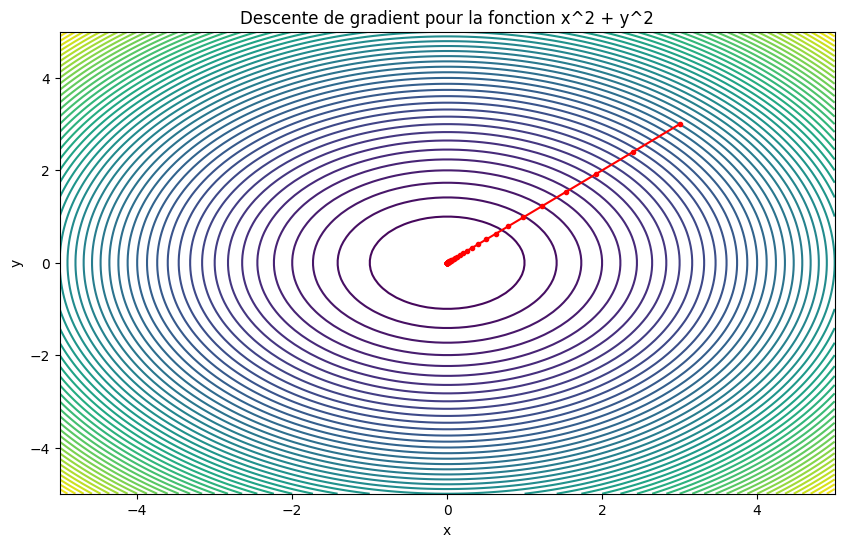

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction à minimiser
def f_(x, y):
    return x**2 + y**2


theta = np.array([3, 3]) 
alpha = 0.1  


x_list = [theta[0]]
y_list = [theta[1]]
f_list = [f_(theta[0], theta[1])]


for i in range(50):

    grad = np.array([2*theta[0], 2*theta[1]])

    theta = theta - alpha * grad
    
    x_list.append(theta[0])
    y_list.append(theta[1])
    f_list.append(f_(theta[0], theta[1]))


plt.figure(figsize=(10, 6))

X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = f_(X, Y)
plt.contour(X, Y, Z, levels=50)


plt.plot(x_list, y_list, 'ro-', markersize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descente de gradient pour la fonction x^2 + y^2')
plt.show()


* Le **taux d'apprentissage contrôle la taille des pas de la descente**

* Si le pas est **trop petit : la convergence risque d'être lente**

* Au contraire, si le pas est **trop grand : la descente de gradient peut osciller ou même diverger**

# Backtracking Line Search 

Le BLS (ou recherche arrière) est utilisée pour **déterminer la longueur du pas à prendre lors d'une descente de gradient**

* **Objectif** : trouver un pas suffisamment petit pour garantir une diminution suffisante de f(x) le long de la direction de recherche

In [160]:
def backtracking_line_search(f, x, p, alpha=0.25, beta=0.5):

    t = 1.0
    fx = f(x[0], x[1])
    grad_fx = gradient(f, x)
    c = alpha * np.dot(grad_fx, p)
    
    # Iterate until Armijo condition is satisfied
    while f(x[0] + t * p[0], x[1] + t * p[1]) >= (f(x[0], x[1]) + t * c):
        t = beta * t
    
    return t

In [161]:
def backtracking_line_search_2D(f, x, d, delta=0.5, c1=0.5):
    # d : direction de recherche
    # t : alpha
    # c1 : constante entre ]0, 1[
    # delta : constante entre [0, 1]
    
    t = 1.0 # alpha
    grad = gradient2D(f, x[0], x[1])

    
    a = f(x[0] + t * d, x[1] + t * d)

    while not np.any(f(x[0] + t * d, x[1] + t * d) <= (f(x[0], x[1]) + c1 * t * np.dot(grad.T,d))):
        t *= delta
    return t

In [162]:
def backtracking_line_search_1D(f, x, d, delta=0.5, c1=0.2):
    # d : direction de recherche
    # t : alpha
    # c1 : constante entre ]0, 1[
    # delta : constante entre [0, 1]
    
    t = 1.0 # alpha
    grad = gradient1D(f, x)

    
    a = f(x + t * d)

    while  f(x + t *d) > f(x) + c1 * t1 * np.dot(grad.T, d):
        t *= delta
    return t

# Autre implémentation

In [181]:
def gradient_method_v2(f, x0, tol):
    x = x0
    gradf = gradient2D(f, x[0], x[1])
    x_list = [(x0[0], x0[1])]
    
    while (np.linalg.norm(gradf) > tol):
        delta_xk = - (gradf/np.linalg.norm(gradf))
        
        alpha = backtracking_line_search_2D(f, x, delta_xk)
        x_new = x + alpha*delta_xk
        
        x = x_new
        print(x)
        gradf = gradient2D(f, x[0], x[1])
        x_list.append((x[0], x[1]))
        
    return x_list

[0.29289322 0.29289322]
[0.11611652 0.11611652]
[0.02772818 0.02772818]
[0.00563109 0.00563109]
[0.00010682 0.00010682]
[2.05004826e-05 2.05004826e-05]
[9.71088943e-06 9.71088943e-06]
[4.31609282e-06 4.31609282e-06]
[1.61869451e-06 1.61869451e-06]
[2.69995362e-07 2.69995362e-07]


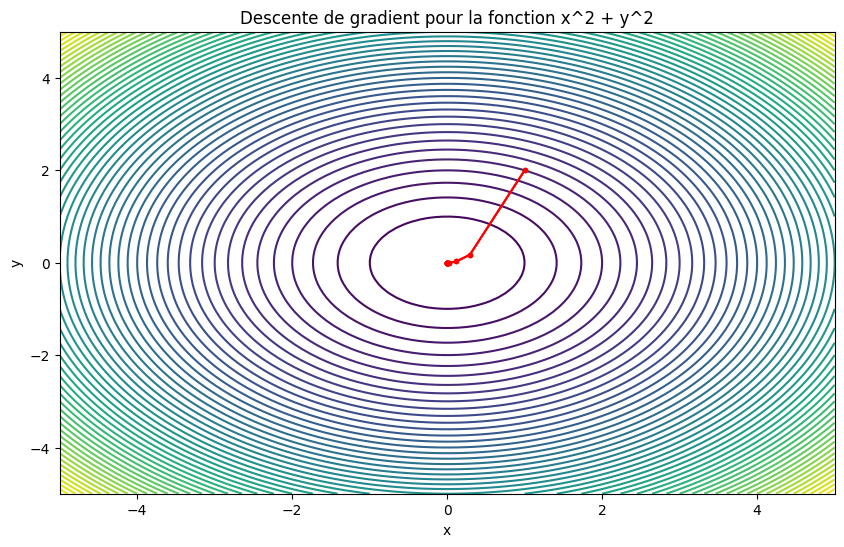

In [182]:
x_list = gradient_method_v2(f_, np.array([1, 1]), 0.000001)
y_list = [f_(j[0], j[1]) for j in x_list]

plt.figure(figsize=(10, 6))

X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = f_(X, Y)
plt.contour(X, Y, Z, levels=50)


plt.plot(x_list, y_list, 'ro-', markersize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descente de gradient pour la fonction x^2 + y^2')
plt.show()

# Non-Linear CG Method : Méthode du gradient conjugué

La méthode  gradient conjugué est une méthode itérative qui cherche à minimiser une fonction convexe de plusieurs variables en exploitant la **conjugaison d'une série de directions descente**

Elle permet de **converger plus rapidement** que la méthode de descente du gradient classique

## Coefficient de conjugaison βk

Il permet d'assurer que la direction de descente à chaque itération est **orthogonale à toutes les directions de descente précédentes**

In [191]:
def CG_descent_method(f, x0, tol):
    x = x0
    
    gradf = gradient(f, x)
    
    deltax = -gradf
    x_list = [(x[0], x[1])]
    
    while (np.linalg.norm(gradf) > tol):
        
        alpha = backtracking_line_search(f, x, deltax)
        x_new = x + alpha * deltax
        gradf_new = gradient(f, x)
        
        beta = (np.dot(gradf_new.T, gradf_new))/(np.dot(gradf.T, gradf))
        deltax_new =  -gradf_new + beta*deltax

        x      = x_new
        gradf  = gradf_new
        deltax = deltax_new
        
        x_list.append((x[0], x[1]))
        
    return x, f_(x[0], x[1]), x_list

In [192]:
def conjugate_gradient_descent(f, x0, max_iter=1000, tol=1e-6):
    
    x = x0
    grad = gradient2D(f, x[0], x[1])
    d = -grad
    k = 0
    
    while k < max_iter:
        t = backtracking_line_search_2D(f, x, d)
        x_new = x + t * d
        
        # Gradient
        grad_new = gradient2D(f, x_new[0], x_new[1])
        
        # Beta
        beta = np.dot(grad_new.T, grad_new - grad) / np.dot(grad.T, grad)
        
        # Delta
        d_new = -grad_new + beta * d
        
        if np.linalg.norm(x_new - x) < tol:
            break
            
        x = x_new
        grad = grad_new
        d = d_new
        k += 1
    return x_new

# Newton SQP Method

La méthode résout un PB quadratique (QP) en tuilisant une approximation quadratique de la FO (fonction coût) = approche itérative

In [107]:
def hessian(f, x, h=1e-4):
    """
    Calcule la matrice Heussienne
    """
    n = x.size
    hess = np.zeros((n, n))
    fx = f(x[0], x[1])
    
    for i in range(n):
        for j in range(i, n):

            x1 = np.copy(x)
            x1[i] += h
            x1[j] += h
            fxx = f(x1[0], x1[1])
            
            x2 = np.copy(x)
            x2[i] += h
            fxi = f(x2[0], x2[1])
            
            x3 = np.copy(x)
            x3[j] += h
            fxj = f(x3[0], x3[1])
            
            hess[i, j] = (fxx - fxi - fxj + fx) / (h**2)
            
            # Fill in lower triangle of Hessian matrix
            hess[j, i] = hess[i, j]
            
    return hess


In [108]:
def newton_method(f, x0, tol=1e-6, maxiter=100):
    x = x0
    x_list = [x]
    
    for i in range(maxiter):
        # Gradient de f
        grad = gradient(f, x)
        
        # Heusienne de f
        hess = hessian(f, x)
        
        # deltax = -Hess * gradf 
        delta_x = np.linalg.solve(hess, -grad)
        x_list.append(x)
        
        # Calcul de alpha
        alpha = backtracking_line_search(f, x, delta_x)
        
        
        # Calcul de x_k+1
        x += alpha*delta_x
        
        if np.linalg.norm(delta_x) < tol:
            break
            
    return x_list, x

Minimum :  [0.99969963 0.99939886]


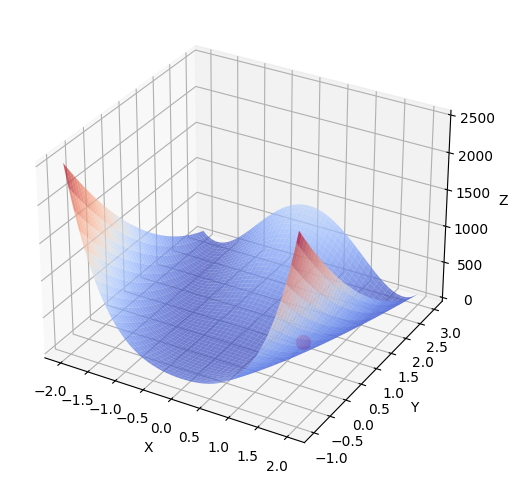

In [195]:
def rosenbrock(x,y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Définir la grille de points pour dessiner la fonction
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Trouver le minimum de la fonction de Rosenbrock à l'aide de la méthode de Newton
x0 = np.array([-1.5, 1.5])
x_list, x_min = newton_method(rosenbrock, x0)

print("Minimum : ", x_min)

# Afficher la fonction de Rosenbrock et la trajectoire suivie par la méthode de Newton
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)
ax.plot([x_min[0]], [x_min[1]], [rosenbrock(x_min[0], x_min[1])], marker='o', markersize=10, color="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()